# **Project 3**, APS1070 Fall 2022
#### **PCA [14 marks]**
**Deadline: Nov 17, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**:
*   **Student number**:



### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



In this project we work on a Covid-19 dataset that reports the number of confirmed cases per day and Fashion MNIST.

# Part 1: Getting started [2 Marks]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.5]**

In [ ]:
### YOUR CODE HERE ###

# Part 2: Applying PCA [3 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.5]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.5]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each componenet and a line to show cumulative --similar to tutoriual. Limit x-axis if needed to better see the plot). **[0.5]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.5]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [ ]:
### YOUR CODE HERE ###

# Part 3: Data reconstruction [5 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[1]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[1]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[1]**


In [ ]:
def plot_country_figures(original_df, country_name):
### YOUR CODE HERE ###

# Part 4: Fashion-MNIST dataset [4 Marks]
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels). 
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why? **[0.5]**
* Compute Eigenvectors and Eigenvalues. **[0.5]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[1]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the items. **[0.5]**
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]**
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [ ]:
x.shape

(1000, 784)

Label is: Ankle boot


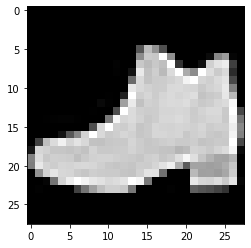

In [ ]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 15
plt.imshow(x.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

In [ ]:
### YOUR CODE HERE ###

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

